<h1>Entrenar modelo de Regresión Logistica con scikit-learn</h1>

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

**Cargue de datos**

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

**División de datos 70% entrenamiento, 30% evaluación**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**Normalización de datos**

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

**Graficado de regiones de desisión**

In [29]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Generador de marcadores y colores.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # superficie
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Pruebas')

**Creación y entrenamiento del modelo** 

In [25]:
modelo = LogisticRegression(C=100.0, random_state=1)
modelo.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Pintar regiones de desición**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


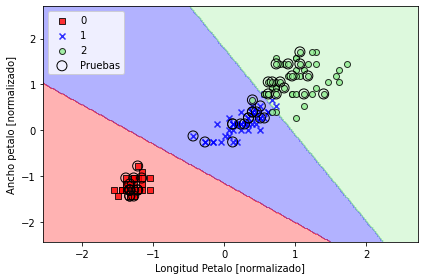

In [30]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Longitud Petalo [normalizado]')
plt.ylabel('Ancho petalo [normalizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



---



**¿Cómo puedo consultar los valores de las probabilidades?**

Se observa que la tercera columna de la primera fila tiene la probabilidad mas alta. Significa que pertenece a la clase 3 (Iris-Virginica)<br>
La segunda y tercera fila pertenecen a la primera clase de flor.

In [31]:
modelo.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

**¿Cómo puedo predecir la etiqueta de clase de una única muestra?**<br>
Con el reshape se convierte la fila en una matriz de datos bidimensional.

In [35]:
modelo.predict(X_test_std[0, :].reshape(1, -1))

array([2])

**¿Cómo se eligió el parametro de regularización C en la regresión?**<br>
El parametro **C** se conoce como parametro de regularización inverso. Aumentarlo o disminuirlo afecta la fuerza de regularización del modelo.<br>La regularizacióón es encontrar una buena compensación entre el <strong>sesgo</strong> y la <strong>varianza</strong>. Ya que:<br>
* Si el **sesgo es elevado** entonces, el modelo resulta con **subajuste**. 
* Si la **varianza es elevada** entonces, el modelo resultado con **sobreajuste**.<br><br>

El **sesgo** mide lo lejos que se encuentra el valor estimado respecto al real de la población completa.<br>
La **varianza** es la diferencia entre las muestras. Así cada vez que se realiza un nuevo muestreo se observa que los resultados suelen ser diferentes.<br>
 **OJO** Al reducir el valor de C aumenta el sesgo y disminuye la varianza. Al aumentar C disminuye el sesgo y aumenta la varianza.

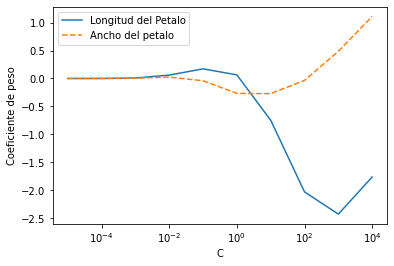

In [39]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Longitud del Petalo')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Ancho del petalo')
plt.ylabel('Coeficiente de peso')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()